In [432]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [433]:
data = pd.read_excel("Data.xlsx")

In [351]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [307]:
mean_x=np.mean(X)

mean_y=np.mean(Y)
m=len(X)
num=0
den=0
for i in range(m):
    num+=(X[i]-mean_x) * (Y[i]-mean_y)
    den+=(X[i]-mean_x) ** 2
b1=num/den
b0=mean_y - (b1 * mean_x)
print(b1,b0)

-0.009725125363831078 1347.4201294224038


In [308]:
win=(-0.009725125363831078*5556)+1347.4201294224038
print(win)

1293.3873329009582


In [352]:
x=x.reshape(-1,1)
y=y.reshape(-1,1)

In [310]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [353]:
from sklearn.model_selection import train_test_split

In [354]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=1/3, random_state=0)

In [355]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train)  

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [314]:
from sklearn.metrics import mean_squared_error

In [328]:
ypred=regressor.predict(x_test)

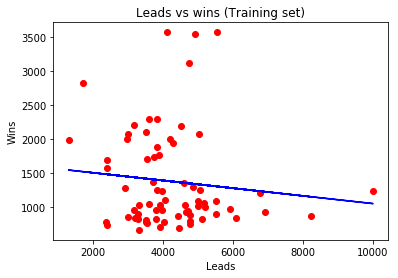

In [329]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Leads vs wins (Training set)')
plt.xlabel('Leads')
plt.ylabel('Wins')
plt.show()

In [330]:
print('Liner Regression R squared: %.4f' % regressor.score(x_test, y_test))

Liner Regression R squared: -0.2471


In [331]:
import numpy as np
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(ypred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Liner Regression RMSE: %.4f' % lin_rmse)

Liner Regression RMSE: 642.6360


In [344]:
a=np.array([6782])
a=a.reshape(-1,1)

In [345]:
ypred=regressor.predict(a)

In [346]:
ypred

array([1237.94168311])

In [356]:
class Stats:
    
    def __init__(self, X, y, model):
        self.data = X
        self.target = y
        self.model = model
        ## degrees of freedom population dep. variable variance
        self._dft = X.shape[0] - 1   
        ## degrees of freedom population error variance
        self._dfe = X.shape[0] - X.shape[1] - 1  
    
    def sse(self):
        '''returns sum of squared errors (model vs actual)'''
        squared_errors = (self.target - self.model.predict(self.data)) ** 2
        return np.sum(squared_errors)
        
    def sst(self):
        '''returns total sum of squared errors (actual vs avg(actual))'''
        avg_y = np.mean(self.target)
        squared_errors = (self.target - avg_y) ** 2
        return np.sum(squared_errors)
    
    def r_squared(self):
        '''returns calculated value of r^2'''
        return 1 - self.sse()/self.sst()
    
    def adj_r_squared(self):
        '''returns calculated value of adjusted r^2'''
        return 1 - (self.sse()/self._dfe) / (self.sst()/self._dft)

In [357]:
def pretty_print_stats(stats_obj):
    '''returns report of statistics for a given model object'''
    items = ( ('sse:', stats_obj.sse()), ('sst:', stats_obj.sst()), 
             ('r^2:', stats_obj.r_squared()), ('adj_r^2:', stats_obj.adj_r_squared()) )
    for item in items:
        print('{0:8} {1:.4f}'.format(item[0], item[1]))

In [358]:
s1 = Stats(x, y, regressor)
pretty_print_stats(s1)

sse:     50461952.4611
sst:     49176065.8962
r^2:     -0.0261
adj_r^2: -0.0360


/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Linear')

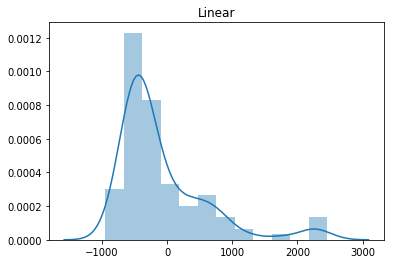

In [359]:
import seaborn as sns

residuals_linear = y - regressor.predict(x)


sns.distplot(residuals_linear);
plt.title('Linear')

In [372]:
from scipy.stats import normaltest
normaltest(residuals_linear)

NormaltestResult(statistic=array([49.71302785]), pvalue=array([1.60307249e-11]))

In [429]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

poly = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression(fit_intercept=False))])
poly.fit(x_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('linear', LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False))])

In [430]:
s1 = Stats(x, y, poly)
pretty_print_stats(s1)

sse:     50877199.2077
sst:     49176065.8962
r^2:     -0.0346
adj_r^2: -0.0445


In [431]:
poly.score(x_train, y_train)

0.01240417380242953

In [611]:
df=pd.read_csv('sample_data_2final.csv',nrows=106)

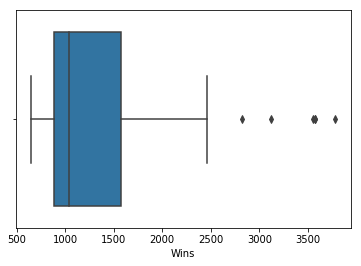

In [614]:
import seaborn as sns
sns.boxplot(x=df['Wins'])

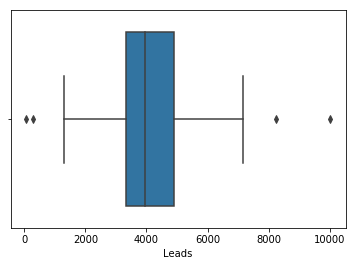

In [615]:
import seaborn as sns
sns.boxplot(x=df['Leads'])

In [616]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df['Wins']))
print(z)

[0.81861501 0.88761895 0.90083247 0.61013501 0.09458609 0.86119191
 0.73346121 0.60279417 0.51301425 0.55581276 0.5352584  0.34733277
 3.33336685 0.87880994 0.93460036 0.79365613 0.0052494  0.08453052
 0.80393332 0.63068938 0.4119322  0.68332185 0.6204122  0.54259924
 0.14472545 3.30400347 0.96396374 0.75548374 0.73786571 0.30916037
 0.39409256 0.69969332 0.6864798  0.60279417 0.60404073 0.70703417
 0.58958065 0.30035136 2.67122264 0.38697333 0.75401557 0.6439029
 0.4501046  0.63487228 0.51910854 0.57196262 0.69675698 1.29848465
 0.37963248 0.10214855 0.85216128 2.22783561 0.92872768 0.57174101
 0.71584318 0.6864798  0.71143867 0.94171959 0.61453952 0.4310184
 0.3458646  1.14139057 0.47653164 0.29741502 0.0096539  3.32896234
 0.50420524 0.76869726 0.33558742 0.07278517 1.03421424 0.50295868
 0.38550516 0.29741502 1.45851507 0.48387248 0.42074122 0.1329801
 3.64021416 0.3970289  0.5778353  0.50149051 0.32237389 1.17809479
 0.57489896 0.6204122  0.03461278 1.45851507 0.58664431 0.3913778

In [617]:
for i in range(len(z)):
    if(z[i]>3 or z[i]<-3):
        print(z[i])
        print(i)

3.3333668461857235
12
3.3040034667416256
25
3.3289623392691086
65
3.6402141613765426
78


In [618]:
df=df.drop(df.index[12])

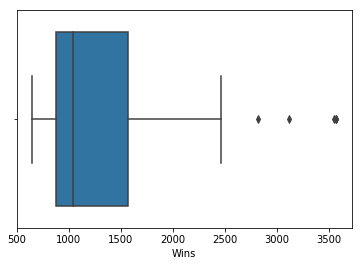

In [608]:
import seaborn as sns
sns.boxplot(x=d['Wins'])

In [621]:
df=df.drop(df.index[24])

In [623]:
df=df.drop(df.index[63])

In [628]:
df=df.drop(df.index[75])

In [631]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df['Leads']))
print(z)

[1.21820781 0.26852511 0.70376239 0.75287761 0.27171423 0.13343015
 0.03312046 0.10620324 0.61029455 2.02681068 0.16606592 0.77867153
 0.15850757 0.56906081 0.40140033 0.93343506 0.09187328 0.48347444
 2.95539182 0.64253695 0.14704361 0.70343927 0.39391222 0.6604494
 1.03836686 0.41573028 0.47702596 1.0172653  0.05533189 0.73926416
 1.42781853 0.14561061 0.39280235 0.20651293 1.02443028 0.64253695
 0.46842799 0.12841467 0.04315143 0.24703017 0.78297052 0.24520381
 0.45051555 0.13955551 0.58697325 0.31008198 0.8209449  4.23720636
 0.19433246 1.7054263  2.89696213 1.2210738  0.46445213 0.64644257
 0.41787977 0.14457099 0.48060845 0.35697746 2.02752718 0.67907834
 1.30601391 0.019507   0.54151077 0.91441274 1.24471822 0.00843641
 0.19576546 0.80837107 0.09832176 0.35124548 0.74102028 0.35769396
 0.82022841 0.15030297 1.92220201 1.21032633 0.32903405 0.20507993
 0.20078094 0.41286429 0.46126301 0.53681841 0.83918047 0.19289947
 0.58052477 0.38029876 0.3674018  0.35411147 0.97459856 0.81911

In [632]:
for i in range(len(z)):
    if(z[i]>3 or z[i]<-3):
        print(z[i])
        print(i)

4.237206364967884
47


In [633]:
a=df

In [636]:
df=df.drop(df.index[45])

In [638]:
x=df['Leads'].values

In [639]:
y=df['Wins'].values

In [644]:
x=x.reshape(-1,1)

In [645]:
y=y.reshape(-1,1)

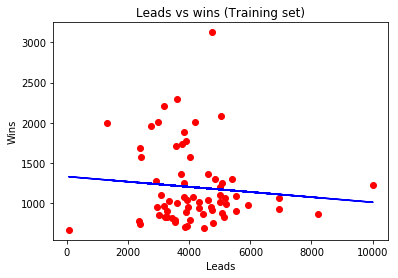

In [646]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=1/3, random_state=0)

from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train)  

from sklearn.metrics import mean_squared_error

ypred=regressor.predict(x_test)

plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('Leads vs wins (Training set)')
plt.xlabel('Leads')
plt.ylabel('Wins')
plt.show()

In [647]:
print('Liner Regression R squared: %.4f' % regressor.score(x_test, y_test))

Liner Regression R squared: 0.0236


In [648]:
import numpy as np
from sklearn.metrics import mean_squared_error
lin_mse = mean_squared_error(ypred, y_test)
lin_rmse = np.sqrt(lin_mse)
print('Liner Regression RMSE: %.4f' % lin_rmse)

Liner Regression RMSE: 548.7550


In [652]:
from sklearn.metrics import r2_score
r2_score(y_test, ypred) 


0.023629148579302983

In [654]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test,ypred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, ypred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, ypred)))

Mean Absolute Error: 431.22928675065333
Mean Squared Error: 301132.0108272739
Root Mean Squared Error: 548.7549642848563


In [655]:
y.max()

3124.0

In [657]:
y_test

array([[ 802.],
       [2462.],
       [ 691.],
       [ 886.],
       [ 911.],
       [ 884.],
       [1247.],
       [1214.],
       [1946.],
       [1119.],
       [ 820.],
       [1071.],
       [2107.],
       [ 668.],
       [ 894.],
       [ 837.],
       [ 935.],
       [ 648.],
       [ 823.],
       [1654.],
       [ 915.],
       [1648.],
       [ 889.],
       [ 975.],
       [1046.],
       [2822.],
       [ 805.],
       [1062.],
       [2298.],
       [ 963.],
       [1102.],
       [ 882.],
       [2072.],
       [1042.]])

In [659]:
ypred

array([[1181.85503597],
       [1218.83561133],
       [1234.39295683],
       [1181.69563694],
       [1217.71981811],
       [1255.33798959],
       [1207.16760221],
       [1117.55346658],
       [1196.64726612],
       [1105.82169785],
       [1221.67291409],
       [1233.62784147],
       [1221.44975545],
       [1228.39955323],
       [1207.80519834],
       [1139.55053296],
       [1185.55309351],
       [1249.28082639],
       [1212.26837122],
       [1175.92539199],
       [1196.87042476],
       [1243.76561989],
       [1169.58131053],
       [1166.58460874],
       [1166.55272893],
       [1278.96092609],
       [1204.55345809],
       [1324.19837129],
       [1211.6626549 ],
       [1212.20461161],
       [1203.94774177],
       [1226.96496195],
       [1237.74033649],
       [1218.70809211]])

In [709]:
y_test=y_test.ravel()
ypred=ypred.ravel()
j=0
i=0
for i in range(34):
    error+=abs(y_test[i]-ypred[i])
print(error)
error=0

14661.79574952221


In [710]:
len(ypred)

34

In [711]:
14661.79574952221/44

333.22263067095935